# Bike Sharing : Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


there are 16 columns but in that some columns have categorical values in integer form Ex. season, months, weekdays, etc.

In [6]:
#Check for NULL/MISSING values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null and missing values

### Duplicate Check

In [7]:
df_duplicate = df.copy()

In [8]:
df_duplicate.drop_duplicates(subset=None, inplace=True)

In [9]:
df_duplicate.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
df.shape

(730, 16)

In [11]:
df_duplicate.shape

(730, 16)

There are no duplicate values

### Removing unwanted columns

In [12]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
new_df=df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

### Creating Dummy Variables

    we need to create dummy variables for 4 categorical variables 
    first we will change it's data type to categorical

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [15]:
new_df['season']=new_df['season'].astype('category')
new_df['weathersit']=new_df['weathersit'].astype('category')
new_df['mnth']=new_df['mnth'].astype('category')
new_df['weekday']=new_df['weekday'].astype('category')

In [16]:
new_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

new_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

new_df.mnth = new_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

new_df.weekday = new_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
new_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## EDA

<Figure size 1440x1080 with 0 Axes>

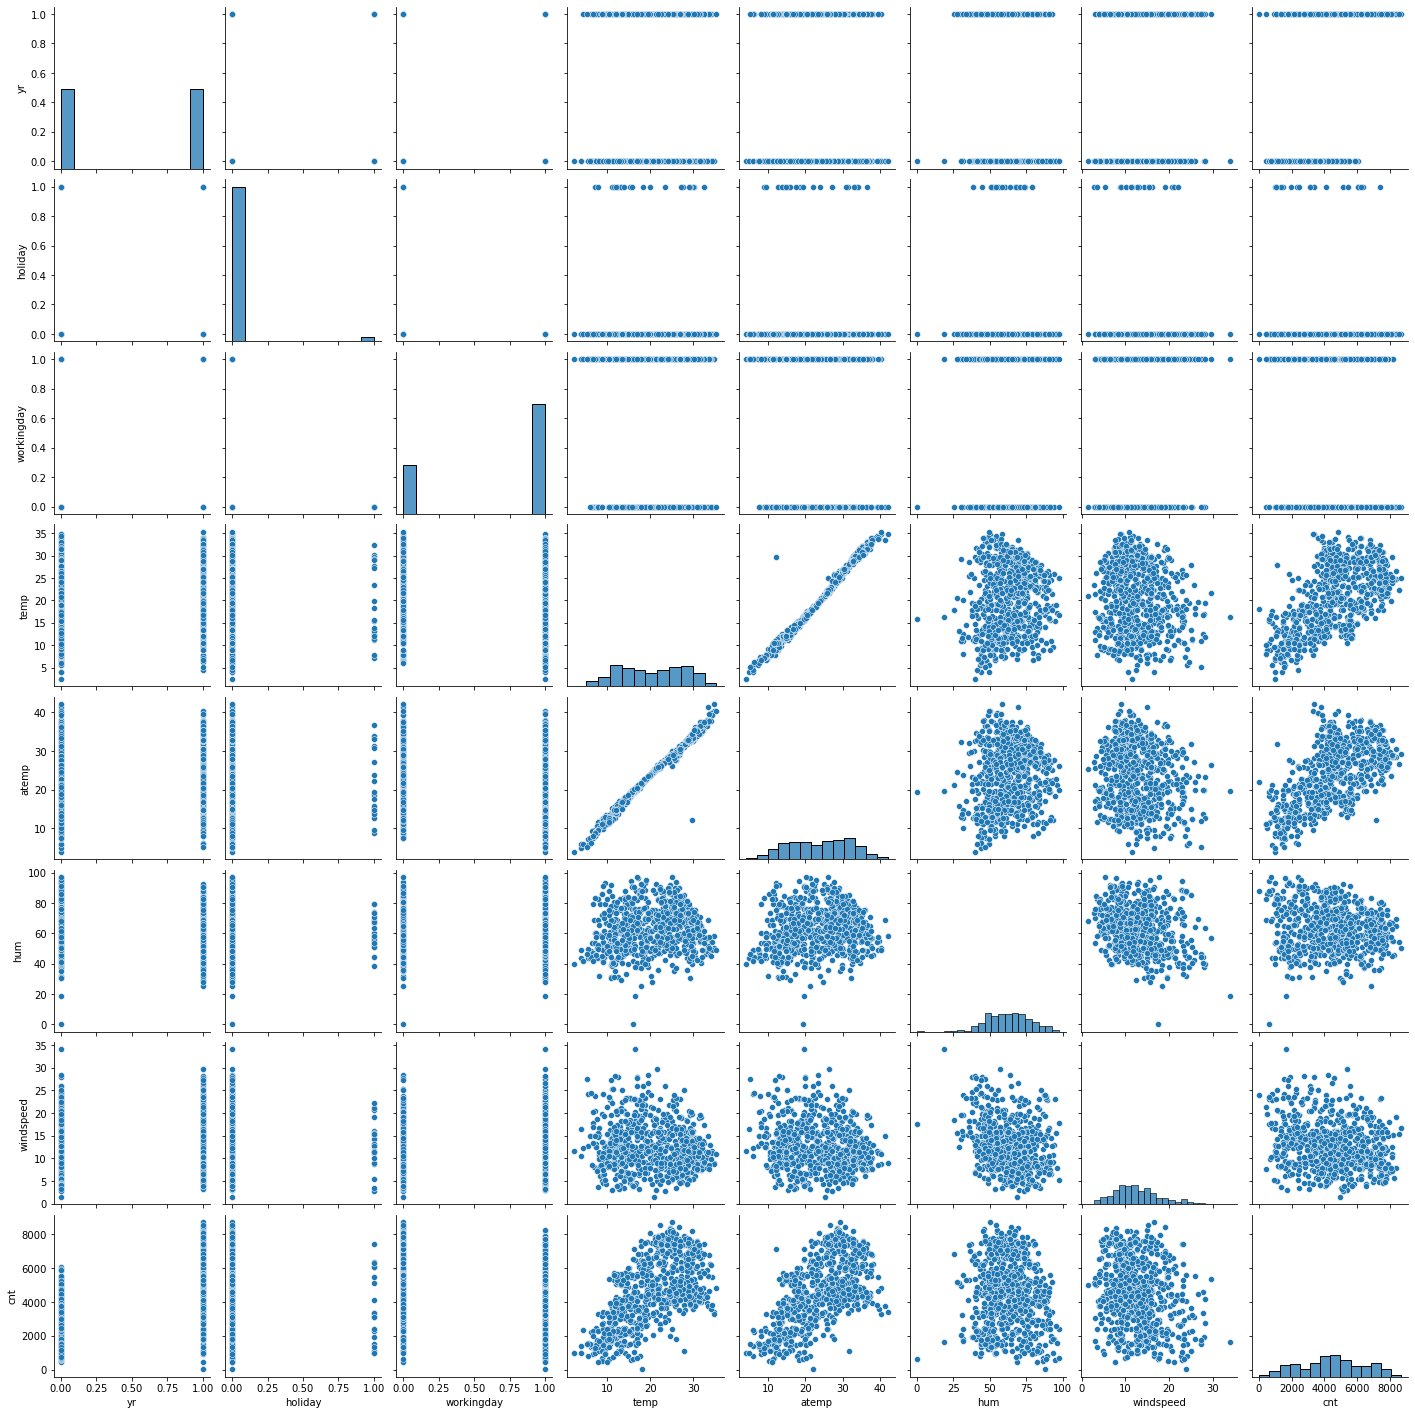

In [18]:
plt.figure(figsize=(20,15))
sns.pairplot(new_df)
plt.show()

### Visualising Numeric Variables

<Figure size 2160x2160 with 0 Axes>

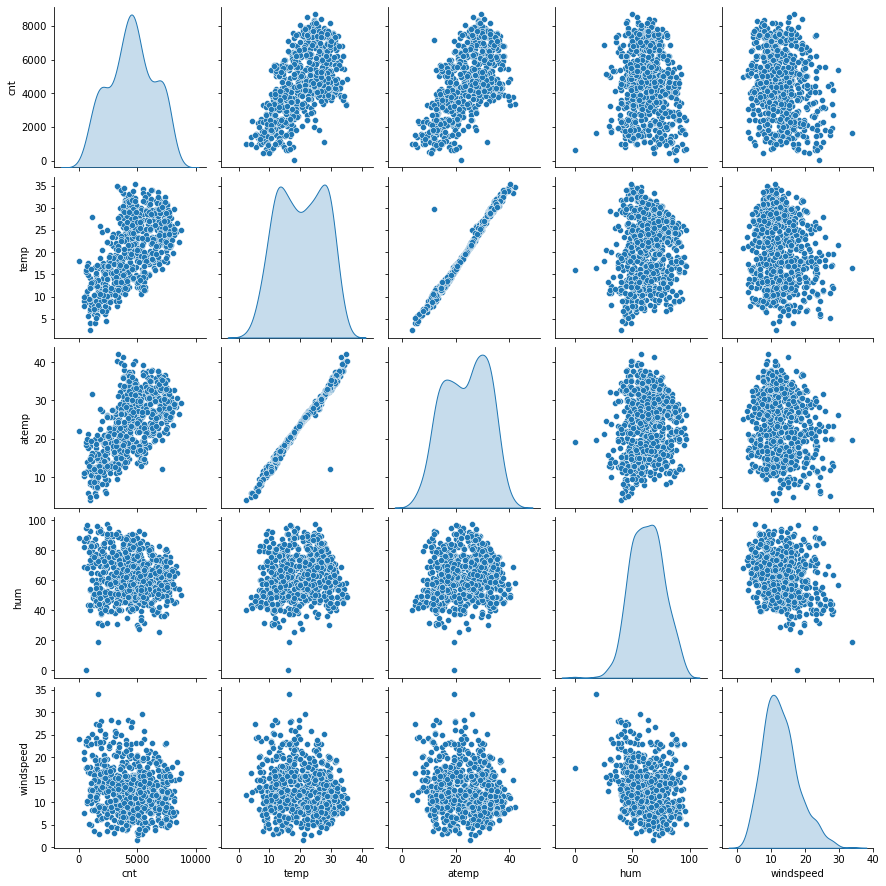

In [19]:
plt.figure(figsize = (30,30))
sns.pairplot(data=new_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'],diag_kind='kde')
plt.show()

 - temp and atemp has the highest correlation as compare to others with the target variable cnt.
 - temp and atemp are highly co-related with each other.

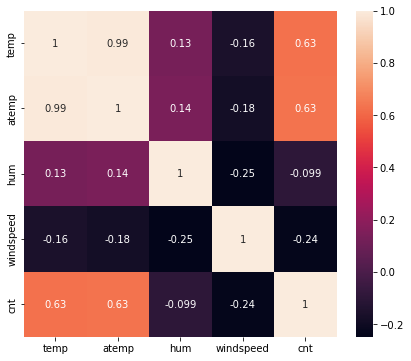

In [20]:
plt.figure(figsize = (7,6))
sns.heatmap(new_df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True)
plt.show()

temp and atemp has correlation more than .99 means almost 1 (highly correlated).

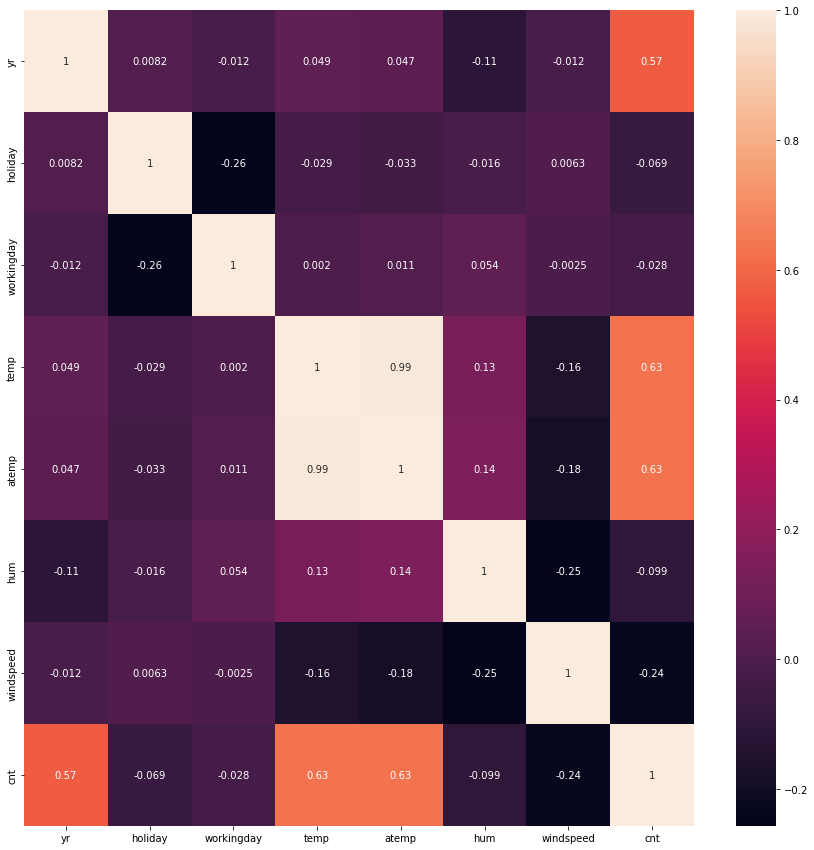

In [21]:
plt.figure(figsize = (15,15))
sns.heatmap(new_df.corr(), annot = True)
plt.show()

We also see Target variable has a linear relationship with some of the indeptendent variables. Good sign for building a linear regression Model.

### Visualising Catagorical Variables

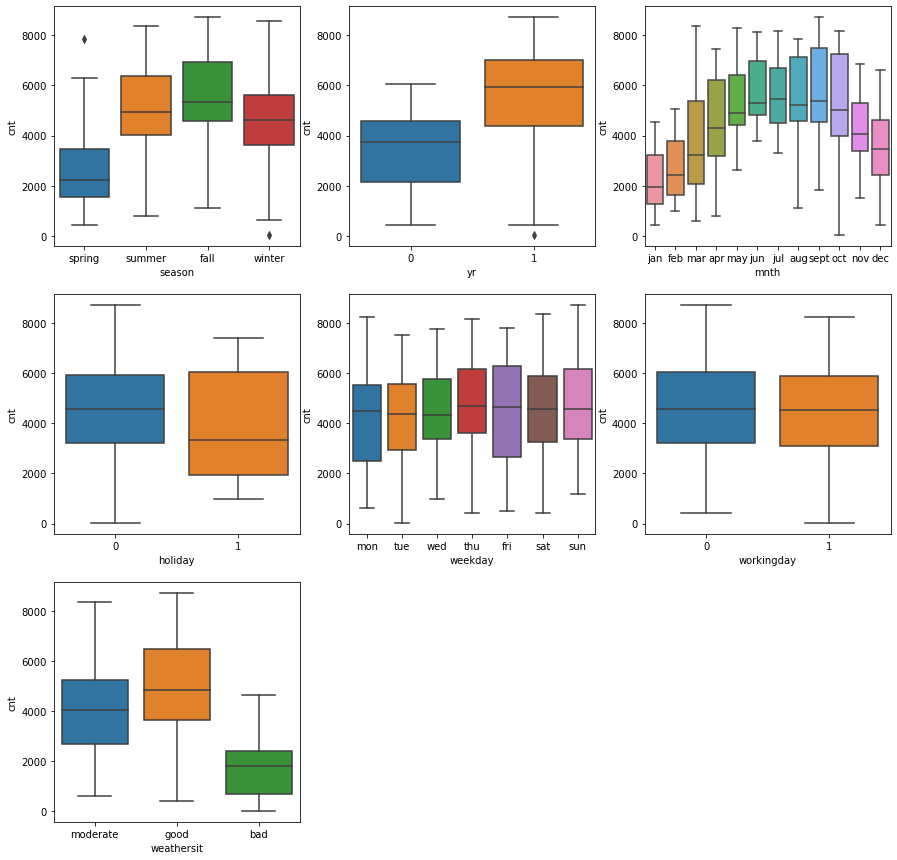

In [22]:
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=new_df, x=i[1], y='cnt')
plt.show()

1. Season: 3:fall has highest demand for rental bikes
2. I see that demand for next year has grown
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weathershit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

### Creating Dummy Variables

    we need to create dummy variables for 4 categorical variables 
    first we will change it's data type to categorical

In [23]:
new_df = pd.get_dummies(new_df, drop_first=True)

In [24]:
new_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    uint8  
 9   season_summer        730 non-null    uint8  
 10  season_winter        730 non-null    uint8  
 11  mnth_aug             730 non-null    uint8  
 12  mnth_dec             730 non-null    uint8  
 13  mnth_feb             730 non-null    uint8  
 14  mnth_jan             730 non-null    uint8  
 15  mnth_jul             730 non-null    uin

### SPLITTING THE DATA
    we will split data into 75:25 ratio for train and test data set

In [26]:
y=new_df.pop('cnt')
X=new_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [27]:
print(X_train.shape)
print(X_test.shape)

(547, 29)
(183, 29)


### RESCALING THE FEATURES

    scale continuous variables  
    Fit and transform training set

In [28]:
num_vars = ['temp','atemp','hum','windspeed']
scaler = MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [29]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.506399,0.023766,0.692870,0.549725,0.525543,0.652339,0.401932,0.226691,0.259598,0.255941,...,0.084095,0.091408,0.149909,0.140768,0.146252,0.135283,0.146252,0.146252,0.617916,0.352834
std,0.500417,0.152459,0.461726,0.226757,0.212513,0.147580,0.183190,0.419074,0.438815,0.436789,...,0.277784,0.288452,0.357309,0.348100,0.353682,0.342339,0.353682,0.353682,0.486342,0.478289
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.345166,0.540488,0.269271,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.553679,0.541742,0.655527,0.379817,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743002,0.697971,0.755887,0.502951,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,1,0.355170,0.373517,0.828620,0.329351,1,0,0,...,0,0,1,0,0,0,0,0,0,1
113,0,0,1,0.651106,0.620474,0.833761,0.405045,0,1,0,...,0,0,0,0,0,0,1,0,0,1
595,1,0,1,0.718600,0.688457,0.731791,0.152821,0,0,0,...,0,0,1,0,0,0,0,0,0,1
662,1,0,1,0.611648,0.591497,0.823051,0.243297,0,0,1,...,1,0,0,0,0,0,0,0,0,1
715,1,0,1,0.416433,0.423233,0.932733,0.180992,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)
rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 7),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 12),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 3),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 6),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 5),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 15),
 ('mnth_sept', False, 4),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 10),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [33]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'weekday_sat', 'weekday_sun', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [34]:
X_train.columns[~rfe.support_]

Index(['temp', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [35]:
X_train_rfe = X_train[col]

In [36]:
#Function to build a model
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [37]:
#Function to calculate VIFs
def vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

## Building Linear Model using 'STATS MODEL'
### Model 1

In [38]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'workingday', 'temp','atemp', 'hum', 'windspeed', 'season_spring',
        'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'weekday_sat','weekday_sun','weathersit_good', 'weathersit_moderate']

build_model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.4
Date:                Mon, 30 May 2022   Prob (F-statistic):          3.45e-198
Time:                        20:22:55   Log-Likelihood:                -4415.9
No. Observations:                 547   AIC:                             8864.
Df Residuals:                     531   BIC:                             8933.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 429.4157    

### Model 2

In [39]:
#Dropping the variable atemp as it has negative coefficient
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
        'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'weekday_sat','weekday_sun','weathersit_good', 'weathersit_moderate']

build_model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.8
Date:                Mon, 30 May 2022   Prob (F-statistic):          7.34e-199
Time:                        20:22:55   Log-Likelihood:                -4417.1
No. Observations:                 547   AIC:                             8864.
Df Residuals:                     532   BIC:                             8929.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 388.8672    

### Model 3

In [40]:
#Dropping the variable hum as it has negative coefficient
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
        'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'weekday_sat','weekday_sun','weathersit_good', 'weathersit_moderate']

build_model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     201.9
Date:                Mon, 30 May 2022   Prob (F-statistic):          3.51e-196
Time:                        20:22:55   Log-Likelihood:                -4426.2
No. Observations:                 547   AIC:                             8880.
Df Residuals:                     533   BIC:                             8941.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -788.4340    

### Model 4

In [41]:
#Dropping the variable workingday as it has high VIF
cols = ['yr', 'temp', 'windspeed', 'season_spring',
        'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'weekday_sat','weekday_sun','weathersit_good', 'weathersit_moderate']

build_model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     215.3
Date:                Mon, 30 May 2022   Prob (F-statistic):          1.13e-195
Time:                        20:22:55   Log-Likelihood:                -4430.2
No. Observations:                 547   AIC:                             8886.
Df Residuals:                     534   BIC:                             8942.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -48.0196    

### Model 5

In [42]:
# Dropping the variable windspeed as it has negative coefficient
cols = ['yr', 'temp', 'season_spring','weathersit_good',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weathersit_moderate']

build_model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     261.7
Date:                Mon, 30 May 2022   Prob (F-statistic):          6.03e-190
Time:                        20:22:55   Log-Likelihood:                -4452.3
No. Observations:                 547   AIC:                             8925.
Df Residuals:                     537   BIC:                             8968.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1191.2018    

### Model 6

In [43]:
# Dropping the variable season_spring as it has negative coefficient
cols = ['yr', 'temp','weathersit_good',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weathersit_moderate']

build_model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     284.1
Date:                Mon, 30 May 2022   Prob (F-statistic):          1.25e-187
Time:                        20:22:55   Log-Likelihood:                -4460.7
No. Observations:                 547   AIC:                             8939.
Df Residuals:                     538   BIC:                             8978.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2032.8971    

### Model 7

In [44]:
# Dropping the variable mnth_jul as it has negative coefficient
cols = ['yr', 'temp','weathersit_good',
       'season_summer', 'season_winter', 'mnth_sept', 'weathersit_moderate']

build_model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     321.4
Date:                Mon, 30 May 2022   Prob (F-statistic):          8.68e-188
Time:                        20:22:55   Log-Likelihood:                -4463.3
No. Observations:                 547   AIC:                             8943.
Df Residuals:                     539   BIC:                             8977.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1995.1587    

### Model 8

In [45]:
# Dropping the variable weathersit_moderate
cols = ['yr', 'temp','weathersit_good',
       'season_summer', 'season_winter', 'mnth_sept']

build_model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     320.0
Date:                Mon, 30 May 2022   Prob (F-statistic):          3.63e-174
Time:                        20:22:55   Log-Likelihood:                -4498.1
No. Observations:                 547   AIC:                             9010.
Df Residuals:                     540   BIC:                             9040.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -272.9090    126.670     

Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.815 Let us select **Model 7** as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [46]:
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [47]:
cols = ['yr', 'temp','weathersit_good',
       'season_summer', 'season_winter', 'mnth_sept', 'weathersit_moderate']
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

-1995.1586680261207 [2094.09931633 4742.22814376 2608.67237747  709.54475518 1282.74912191
  796.79392462 1907.48208925]


## Model Evaluation

In [48]:
y_train_pred = lr.predict(X_train[cols])

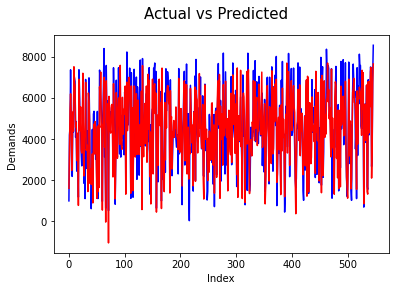

In [49]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted result following almost the same pattern so this model seems ok

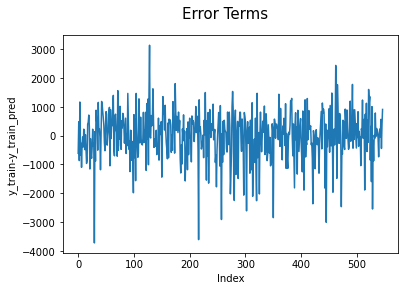

In [50]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [51]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [52]:
#Columns from our final model
cols = ['yr', 'temp','weathersit_good',
       'season_summer', 'season_winter', 'mnth_sept', 'weathersit_moderate']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

Here,If we see the error terms are independent of each other

In [53]:
r2_score(y_train,y_train_pred)

0.8067505299801407

R2 Same as we obtained for our final model

Text(0, 0.5, 'y_test_pred')

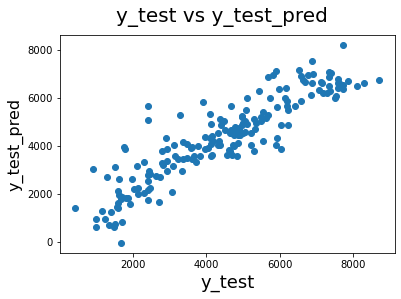

In [54]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)

We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

Text(0, 0.5, 'Counts')

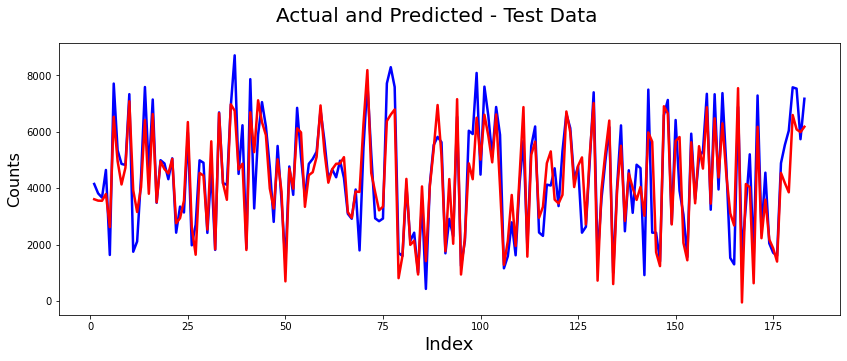

In [55]:
# Plot Test vs Predicted test values
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted - Test Data', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Counts', fontsize=16)

### R^2 Value for TEST

In [56]:
r2_score(y_test, y_test_pred)

0.8060731984796423

 - **Train R^2 :0.807**
 - **Test R^2 :0.806**
 - This seems to be a really good model that can very well 'Generalize' various datasets.

## conclusion

As per our final Model, the top 3 predictor variables that influences the bike booking are:

 - **Temperature (temp)**: - High coefficient value indicated that a unit increase in temp variable increases the bike hire numbers.

 - **weathersit_good**: - 2nd Highest coefficient value indicated that, a unit increase in Weathersit_good variable increases the bike hire numbers.

 - **Year (yr)**: - 3rd Highest coefficient value indicated that a unit increase in yr variable increases the bike hire numbers.

So, it's suggested to consider these variables most importance while planning, to achive maximum Booking
The next best features that can also be considered are

 - **weathersit_moderate**: - 4th Highest coefficient value indicated that, a unit increase in weathersit_moderate variable increases the bike hire numbers.

 - **season_ winter**: - 5th Highest coefficient value indicated that, a unit increase in season_ winter variable increases the bike hire numbers.


#### NOTE:

The details of weathersit_good & weathersit_moderate:

 - weathersit_good: Clear, Few clouds, Partly cloudy, Partly cloudy
 - weathersit_moderate: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist